In [4]:
# -*- coding:utf-8 -*-
import numpy as np
import matplotlib.pyplot as plt
import sklearn.datasets as ds
import matplotlib.colors

In [21]:
min_distance = 2 #邻域半径=阶段距离
points_number = 100  #随机点个数(初始数据集) 

In [6]:
'''
函数功能：计算各点之间的距离和局部密度
参数说明：
    datas：原始数据集
    labers：标签
    min_distance: 邻域半径(截断距离)
    points_number: 数据集大小
返回：
    distance_all: 各点之间的距离
    point_density: 各点之间的局部密度
'''
def get_point_density(datas,labers,min_distance,points_number):
    data = datas.tolist() # 将numpy.ndarray格式转换为list格式
    laber = labers.tolist()
    distance_all = np.random.rand(points_number,points_number)
    point_density = np.random.rand(points_number)
    
    # 计算各点之间的距离
    for i in range(points_number):
        for j in range(points_number):
            distance_all[i][j] = np.sqrt(np.square(data[i][0] - data[j][0]) + np.square(data[i][1] - data[j][1]))
    print('距离数组：\n', distance_all ,'\n')
    
    # 计算各点之间的局部密度
    for i in range(points_number):
        x = 0
        for j in range(points_number):
            if distance_all[i][j] > 0 and distance_all[i][j] < min_distance:
                x = x + 1
        point_density[i] = x
    print('点密度数组：',point_density,'\n')
    return distance_all,point_density

In [7]:
'''
函数功能：计算点密度最大的点的聚类中心距离
参数说明：
    distabce_all:各点之间的距离
    point_density:各点的局部密度
    laber:索引
返回：
    局部密度最大的点的聚类中心距离
'''
def get_max_distance(distance_all,point_density,laber):
    point_density = point_density.tolist()
    # 局部密度最大的点
    a = int(max(point_density))
    # 密度最大的点对应的索引
    b = laber[point_density.index(a)]
    # 距离
    c = max(distance_all[b])
    
    return c

In [8]:
'''
函数功能：得到所有点的聚类中心距离
参数说明：
    distabce_all:各点之间的距离
    point_density:各点的局部密度
    data:原始数据集
    laber:索引
返回：
    dis:聚类中心距离
'''
def get_each_distance(distance_all,point_density,data,laber):
    dis = []
    for i in range(len(point_density)):
        dis2 = []
        for j in range(len(point_density)):
            if point_density[i] < point_density[j]:
                dis2.append(j)
        l = get_min_distance(dis2,i,distance_all,point_density,data,laber)
        dis.append(l)
    return dis

In [9]:
'''
函数功能：计算数据点局部密度大于自身，且距离最近的点
参数说明：
    dis2：局部密度大于i的下标
    i：待计算点
    distance_all:各点之间的距离
    point_density:各点的局部密度
    data:原始数据集
    laber:索引
返回：
'''
def get_min_distance(dis2,i,distance_all,point_density,data,laber):
    min_distance = []
    # dis2为空，说明该点事密度最大的点，该点的聚类中心计算方法与其他不同
    if dis2 != []:
        for k in dis2:
            min_distance.append(distance_all[i][k])
        return min(min_distance)
    else:
        max_distance = get_max_distance(distance_all,point_density,laber)
        return max_distance

In [10]:
# 绘图
def get_picture(data,laber,points_number,point_density,nn):
    # 创建 Figure
    fig = plt.figure(figsize=(8,8),dpi=80)
    # 用来正常显示中文标签
    matplotlib.rcParams['font.sans-serif'] = [u'SimHei']
    # 用来正常显示负号
    matplotlib.rcParams['axes.unicode_minus'] = False
    
    # 原始数据点的分布
    ax1 = fig.add_subplot(211)
    plt.scatter(data[:,0],data[:,1],c=laber)
    plt.title(u'原始数据分布')
    plt.sca(ax1)
    for i in range(points_number):
        plt.text(data[:,0][i],data[:,1][i],laber[i])
       
    print('\n')
    
    # 聚类后分布
    ax2 = fig.add_subplot(212)
    plt.scatter(point_density.tolist(),nn,c=laber)
    plt.title(u'聚类后数据分布：局部密度作为横坐标，聚类中心距离作为纵坐标')
    plt.sca(ax2)
    for i in range(points_number):
        plt.text(point_density[i],nn[i],laber[i])
        
    plt.show()

In [18]:
def main():
    # 随机生成点坐标
    # n_samples是待生成的样本的总数，n_features是每个样本的特征数，centers表示类别数。
    data, laber = ds.make_blobs(n_samples=points_number,n_features=2,centers=2)
    #print('各点坐标：\n', data)
    #print('各点索引：', laber, '\n')
    
    # 计算各点间距离、各点点密度(局部密度)大小
    distance_all, point_density = get_point_density(data, laber, min_distance, points_number)
    # 得到各点的聚类中心距离
    nn = get_each_distance(distance_all, point_density, data, laber)
    print('最后的各点点密度：', point_density.tolist())
    print('最后的各点中心距离：', nn)

    # 画图
    get_picture(data, laber, points_number, point_density, nn)
    """
    距离归一化：就把上面的nn改为：nn/max(nn)
    """

距离数组：
 [[ 0.         15.98033029  1.96256679 ...  2.52108878 13.98267921
   1.46188214]
 [15.98033029  0.         16.82834561 ... 16.11145681  2.27952366
  15.29372209]
 [ 1.96256679 16.82834561  0.         ...  1.08031913 14.71603067
   1.58780603]
 ...
 [ 2.52108878 16.11145681  1.08031913 ...  0.         13.95792035
   1.42662106]
 [13.98267921  2.27952366 14.71603067 ... 13.95792035  0.
  13.20832547]
 [ 1.46188214 15.29372209  1.58780603 ...  1.42662106 13.20832547
   0.        ]] 

点密度数组： [43. 29. 27. 42. 24. 35. 32. 35. 40.  2. 17. 16. 33. 30. 44. 41. 28. 24.
 42. 17. 29. 26. 39. 36. 39. 36. 35. 31.  4. 21. 30. 15. 39. 28. 33. 31.
 25. 16. 32. 31. 17. 27.  6. 33. 39. 42. 38. 33. 34. 29. 24. 38. 46. 31.
 27. 42. 42. 44. 42. 44. 24. 40. 27. 37. 37. 39. 35. 40. 33. 21. 40. 37.
 38. 35.  9. 40. 40. 31. 40. 26. 16. 31. 45. 42. 32. 30. 32. 43. 29. 38.
 41. 23. 38. 38. 15. 34. 20. 16. 30. 33.] 

最后的各点点密度： [43.0, 29.0, 27.0, 42.0, 24.0, 35.0, 32.0, 35.0, 40.0, 2.0, 17.0, 16.0, 33.0, 30.

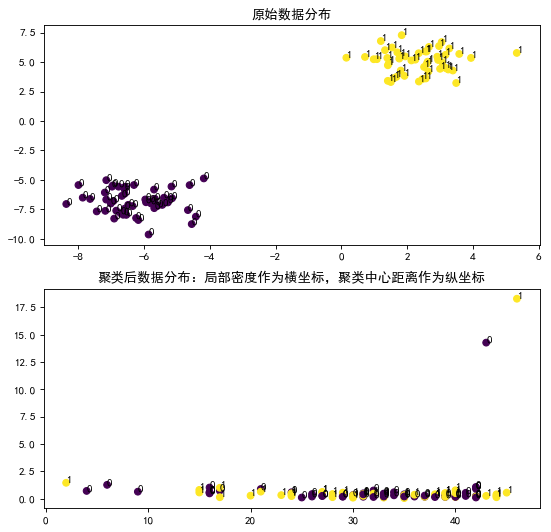

In [24]:
if __name__ == '__main__':
    main()